## 关联图

### 关联图应用场景
1. 数据报告 & 学术报告\
    展示趋势\
    展现状态
2. 数据探索 & 数据解读\
    探索数据关系
3. 统计学 & 机器学习\
    指导数据预处理和模型选择

#### 散点图

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from scipy.spatial import ConvexHull

%matplotlib inline

##### plt.scatter()

In [2]:
midwest = pd.read_csv(r"./data/midwest_filter.csv")

In [3]:
midwest.head(2)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.96154,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.00000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260


In [4]:
midwest.shape

(332, 29)

In [5]:
categories = midwest["category"].value_counts().index

##### plt.cm.tab10()-->RGBA

In [6]:
colors = plt.cm.tab20([i / len(categories) for i in range(len(categories))])
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.68235294, 0.78039216, 0.90980392, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.59607843, 0.8745098 , 0.54117647, 1.        ],
       [1.        , 0.59607843, 0.58823529, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.76862745, 0.61176471, 0.58039216, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.78039216, 0.78039216, 0.78039216, 1.        ],
       [0.85882353, 0.85882353, 0.55294118, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

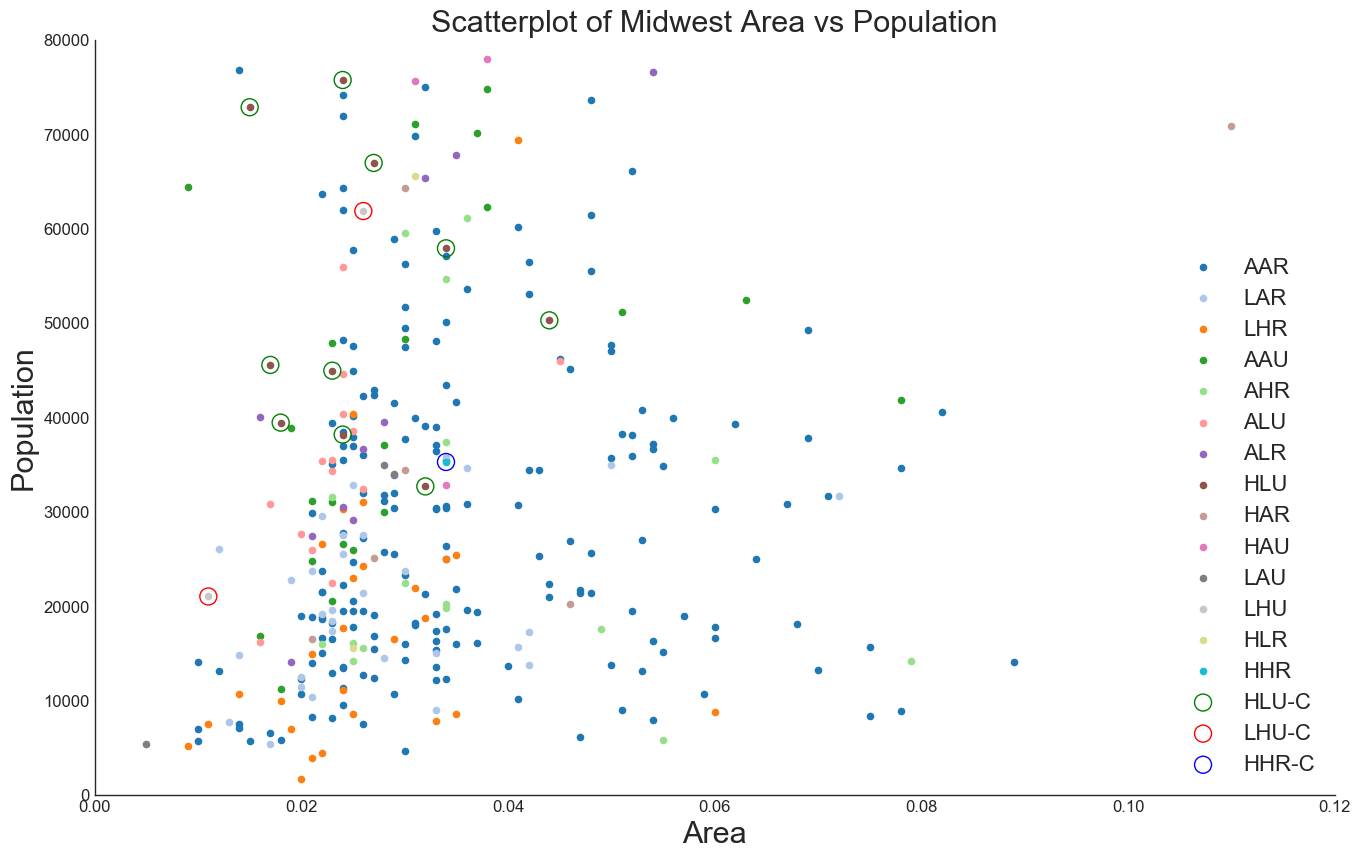

In [7]:
def generate_cm(i, count):
    return np.array(plt.cm.tab20(i/count)).reshape(1, -1)


large = 22; med = 16; small = 12
params = {
    "axes.titlesize": large, # 子图上的标题字体大小
    "legend.fontsize": med, # 图例的字体大小
    "figure.figsize": (med, small), # 图像画布大小
    "axes.labelsize": med, # 标签字体大小
    "xtick.labelsize": med, # x轴上的标尺字体大小
    "ytick.labelsize": med, # y周上的标尺字体大小
    "figure.titlesize": large # 整个画布的标题字体大小
}
plt.rcParams.update(params) # 更新参数默认值
plt.style.use("seaborn-whitegrid") # 风格
sns.set_style("white") # 背景风格

colors = [generate_cm(i, len(categories)) for i in range(len(categories))]
plt.figure(figsize=(16, 10),
           dpi=100,
           facecolor="w",
           edgecolor="k")
for i, category in enumerate(categories):
    x = midwest.loc[midwest["category"]==categories[i], "area"]
    y = midwest.loc[midwest["category"]==categories[i], "poptotal"]
    plt.scatter(x,
                y,
                s=20,
                c=colors[i],
                label=category)
    
# 高学历, 低贫困地区
plt.scatter("area", "poptotal",
            data=midwest.loc[midwest.category == "HLU", :],
            s=150,
            facecolor="None",
            edgecolors="green",
            label="HLU-C")

# 低学历, 高贫困地区
plt.scatter("area", "poptotal",
            data=midwest.loc[midwest.category == "LHU", :],
            s=150,
            facecolor="None",
            edgecolors="red",
            label="LHU-C")

plt.scatter("area", "poptotal",
            data=midwest.loc[midwest.category == "HHR", :],
            s=150,
            facecolor="None",
            edgecolors="blue",
            label="HHR-C")

axes = plt.gca()
axes.set(xlim=(0.0, 0.12), ylim=(0, 80000))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.xticks([]) # x轴坐标刻度不设置为空
# plt.yticks([]) # y轴坐标刻度不设置为空
plt.xlabel("Area", fontsize=22)
plt.ylabel("Population", fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
# axes.spines['bottom'].set_visible(False)
# axes.spines['left'].set_visible(False)
# plt.axis('off') # 关闭坐标轴
# axes.get_yaxis().set_visible(False) # 坐标轴不可见
# axes.axes.get_xaxis().set_visible(False) # 坐标轴不可见
plt.legend(fontsize=16)
plt.show()

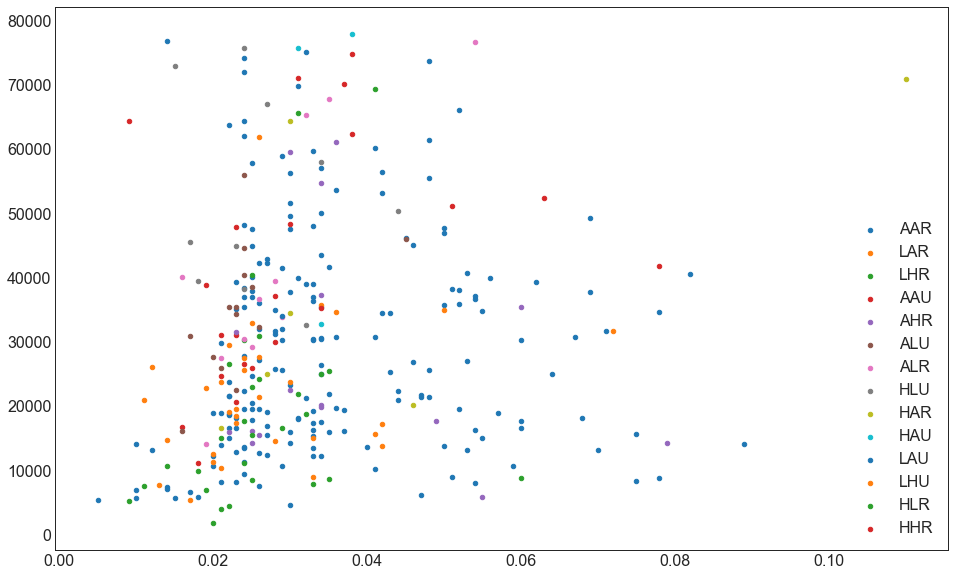

In [8]:
plt.figure(figsize=(16, 10))
for i, category in enumerate(categories):
    x = midwest.loc[midwest["category"]==categories[i], "area"]
    y = midwest.loc[midwest["category"]==categories[i], "poptotal"]
    plt.scatter(x, y, s=20, cmap=plt.cm.tab20, label=category)
    del x, y
plt.legend()
plt.show()

In [9]:
midwest["c1"] = midwest["category"].str[0]
midwest["c2"] = midwest["category"].str[1]
midwest["c3"] = midwest["category"].str[2]

In [10]:
data = midwest.copy()

In [11]:
data.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [12]:
data.iloc[:, -3:] = OE().fit_transform(data.iloc[:, -3:])

In [13]:
data.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,0.0,0.0,0.0
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,2.0,1.0,0.0
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,0.0,0.0,0.0
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,0.0,2.0,1.0
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,0.0,0.0,0.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 32 columns):
PID                     332 non-null int64
county                  332 non-null object
state                   332 non-null object
area                    332 non-null float64
poptotal                332 non-null int64
popdensity              332 non-null float64
popwhite                332 non-null int64
popblack                332 non-null int64
popamerindian           332 non-null int64
popasian                332 non-null int64
popother                332 non-null int64
percwhite               332 non-null float64
percblack               332 non-null float64
percamerindan           332 non-null float64
percasian               332 non-null float64
percother               332 non-null float64
popadults               332 non-null int64
perchsd                 332 non-null float64
percollege              332 non-null float64
percprof                332 non-null float64
poppovertykno

In [15]:
# 去掉对象为object的列
data = data.loc[:, data.dtypes.values != "O"]

In [16]:
data.dtypes.values

array([dtype('int64'), dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

In [17]:
data_copy = data.loc[:, data.dtypes.values == "int64"].copy()
data.loc[:, data.dtypes.values == "int64"] = data_copy.astype("float")
del data_copy

In [18]:
data.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64')], dtype=object)

In [19]:
X = data.iloc[:, 1:-3]
y = data.iloc[:, -3:]

In [20]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.3, random_state=435)

In [21]:
ss = StandardScaler().fit(X_train.iloc[:, [*range(23), -1]])

In [22]:
X_train_ = X_train.copy()
X_test_ = X_test.copy()

In [23]:
X_train_.iloc[:, [*range(23), -1]] = ss.transform(X_train.iloc[:, [*range(23), -1]].values)
X_test_.iloc[:, [*range(23), -1]] = ss.transform(X_test.iloc[:, [*range(23), -1]].values)

In [24]:
for i in range(3):
    lr = LR(solver="newton-cg", max_iter=10e4, multi_class="multinomial")
    lr.fit(X_train_.values, y_train.iloc[:, i].ravel())
    print(y.columns[i])
    print("Train: {}".format(lr.score(X_train_.values, y_train.iloc[:, i].ravel())))
    print("Test: {}".format(lr.score(X_test_.values, y_test.iloc[:, i].ravel())))
    coeff = pd.DataFrame(lr.coef_).T
    if i != 2:
        coeff["mean"] = coeff.iloc[:, :-1].mean(axis=1)
        coeff["name"] = X_train.columns
        coeff.columns = ["Average", "High", "Low", "mean", "name"]
        print(coeff.sort_values(by="mean", ascending=False).head())
    else:
        coeff["name"] = X_train.columns
        coeff.columns = ["Coef", "mean"]
        print(coeff.sort_values(by="Coef", ascending=False).head())    

c1
Train: 0.9956896551724138
Test: 0.97
     Average      High       Low      mean           name
14  1.245069  2.176097 -3.421166  1.710583        perchsd
15 -0.552140  0.964636 -0.412496  0.206248     percollege
16 -0.696393  0.998001 -0.301608  0.150804       percprof
5   0.397157 -0.104221 -0.292936  0.146468  popamerindian
11  0.117715  0.133309 -0.251024  0.125512      percasian
c2
Train: 0.9913793103448276
Test: 0.9
     Average      High       Low      mean                  name
20  0.248728  1.511900 -1.760628  0.880314  percchildbelowpovert
19 -0.013802  1.674904 -1.661102  0.830551      percbelowpoverty
21 -0.450380  2.081825 -1.631445  0.815723      percadultpoverty
22  0.210933  0.601360 -0.812293  0.406147    percelderlypoverty
5   0.309432  0.186773 -0.496205  0.248103         popamerindian
c3
Train: 1.0
Test: 0.99
        Coef              mean
23  2.934848           inmetro
18  0.139302  percpovertyknown
16  0.124003          percprof
17  0.104575   poppovertyknown
3  

#### 气泡图

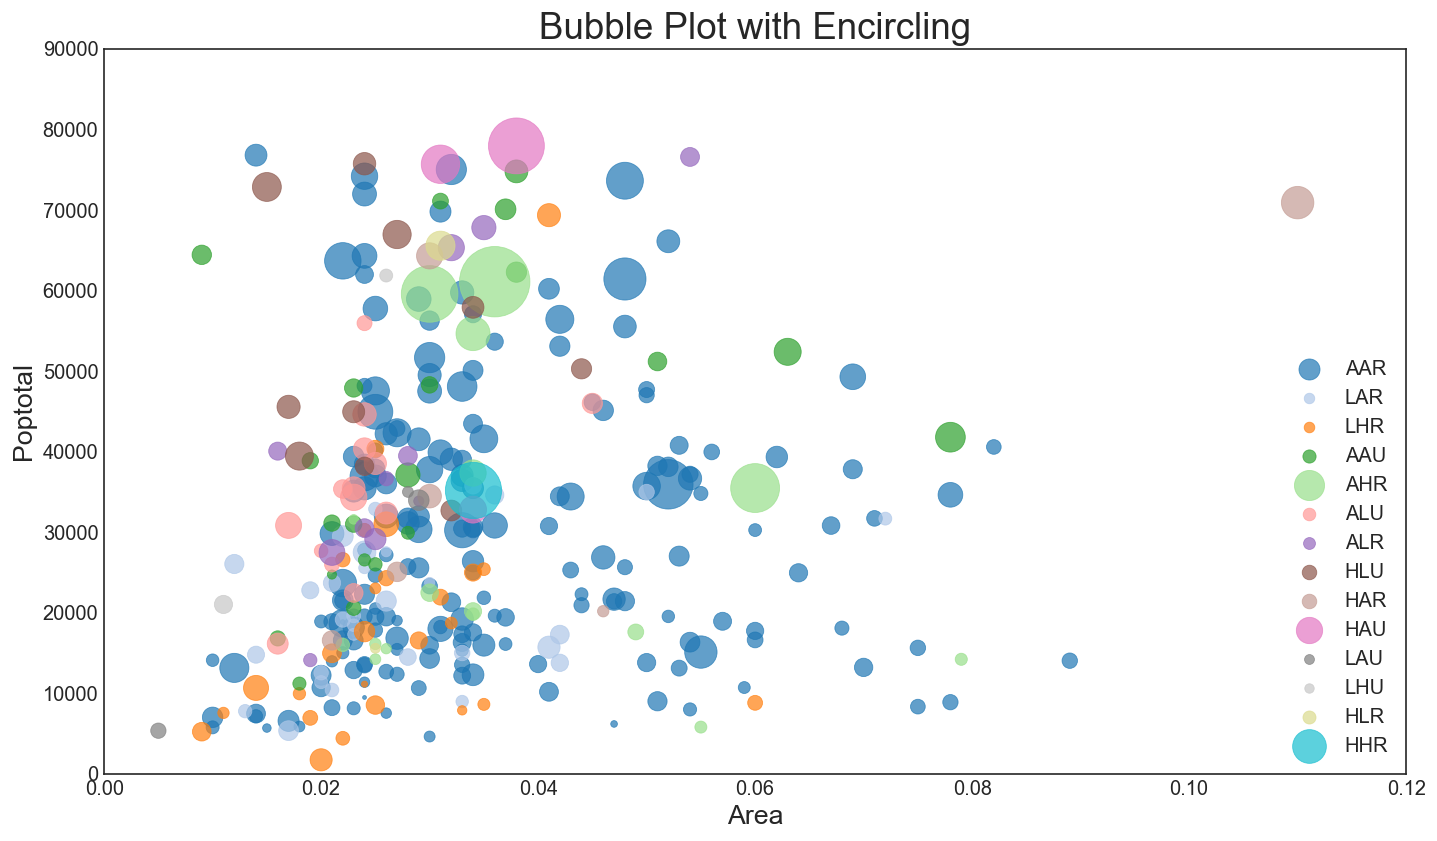

In [25]:
fig = plt.figure(figsize=(14, 8),
                 dpi=120,
                 facecolor="w",
                 edgecolor="k")
for i, category in enumerate(categories):
    plt.scatter("area", "poptotal",
                data=midwest.loc[midwest.category==category, :],
                s=midwest.loc[midwest.category==category, "percasian"]*500,
                # s="dot_size",
                c=colors[i],
                label=str(category),
                edgecolors=colors[i],
                alpha=0.7,
                linewidths=.5)
axes = plt.gca()
axes.set(xlim=(0.0, 0.12), ylim=(0, 90000), xlabel="Area", ylabel="Poptotal")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
lgnd = plt.legend(fontsize=12,
                  markerscale=0.6 # 气泡的比例
                 )
plt.show()

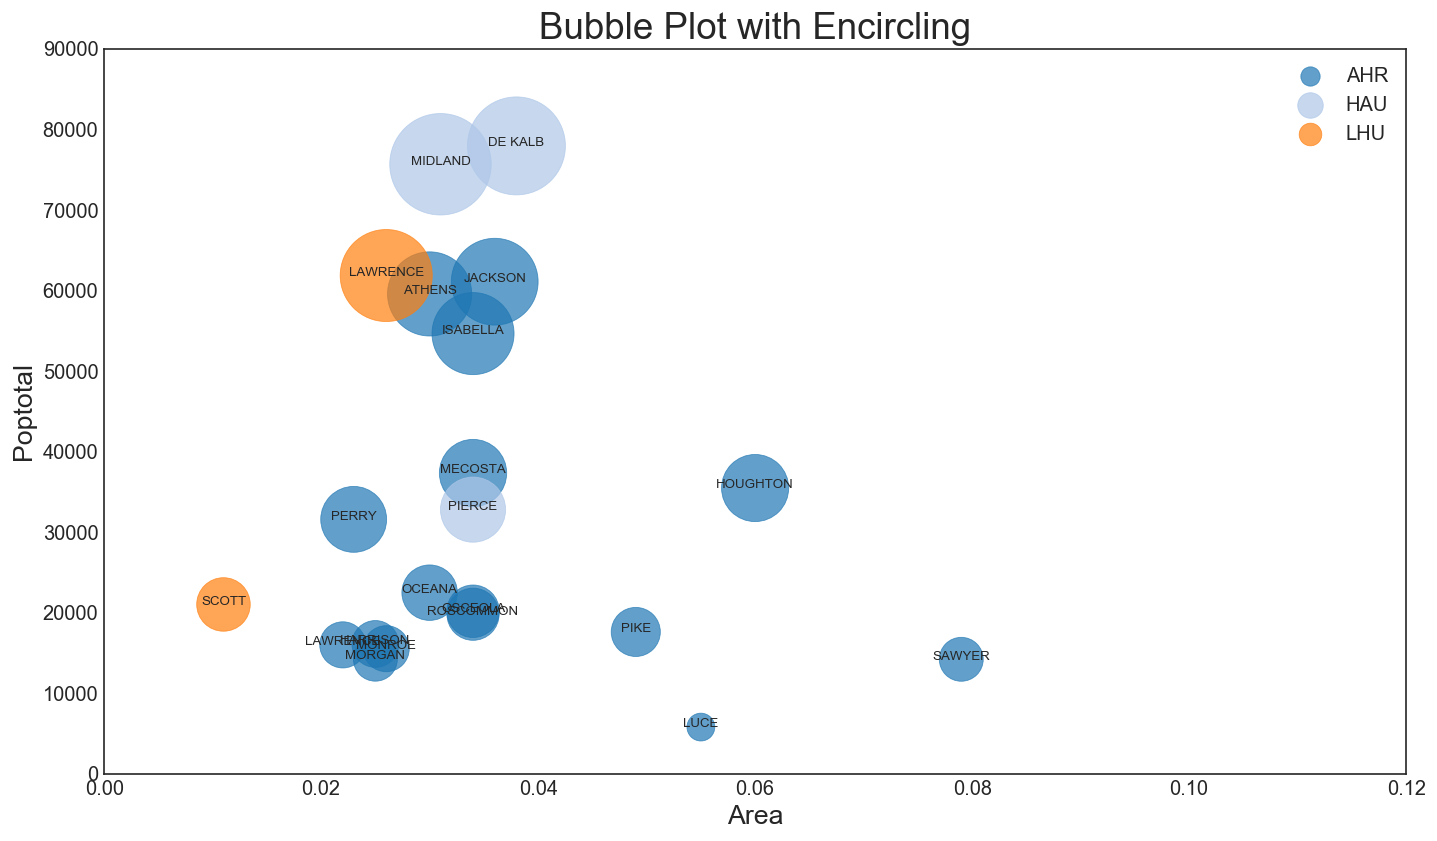

In [26]:
fig = plt.figure(figsize=(14, 8),
                 dpi=120,
                 facecolor="w",
                 edgecolor="k")
for i, category in enumerate(["AHR", "HAU", "LHU"]):
    data_ = midwest.loc[midwest.category==category, :]
    data_.index = range(data_.shape[0])
    plt.scatter("area", "poptotal",
                data=data_,
                s=data_.loc[:, "poppovertyknown"]*0.05,
                # s="dot_size",
                c=colors[i],
                label=str(category),
                edgecolors=colors[i],
                alpha=0.7,
                linewidths=.5)
    for j in range(midwest.loc[midwest.category==category, :].shape[0]):
        plt.text(data_.loc[j, "area"],
                 data_.loc[j, "poptotal"],
                 s=data_.loc[j, "county"],
                 fontdict={"fontsize": 8},
                 horizontalalignment="center")
axes = plt.gca()
axes.set(xlim=(0.0, 0.12), ylim=(0, 90000), xlabel="Area", ylabel="Poptotal")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
lgnd = plt.legend(fontsize=12,
                  markerscale=0.3 # 气泡的比例
                 )
plt.show()

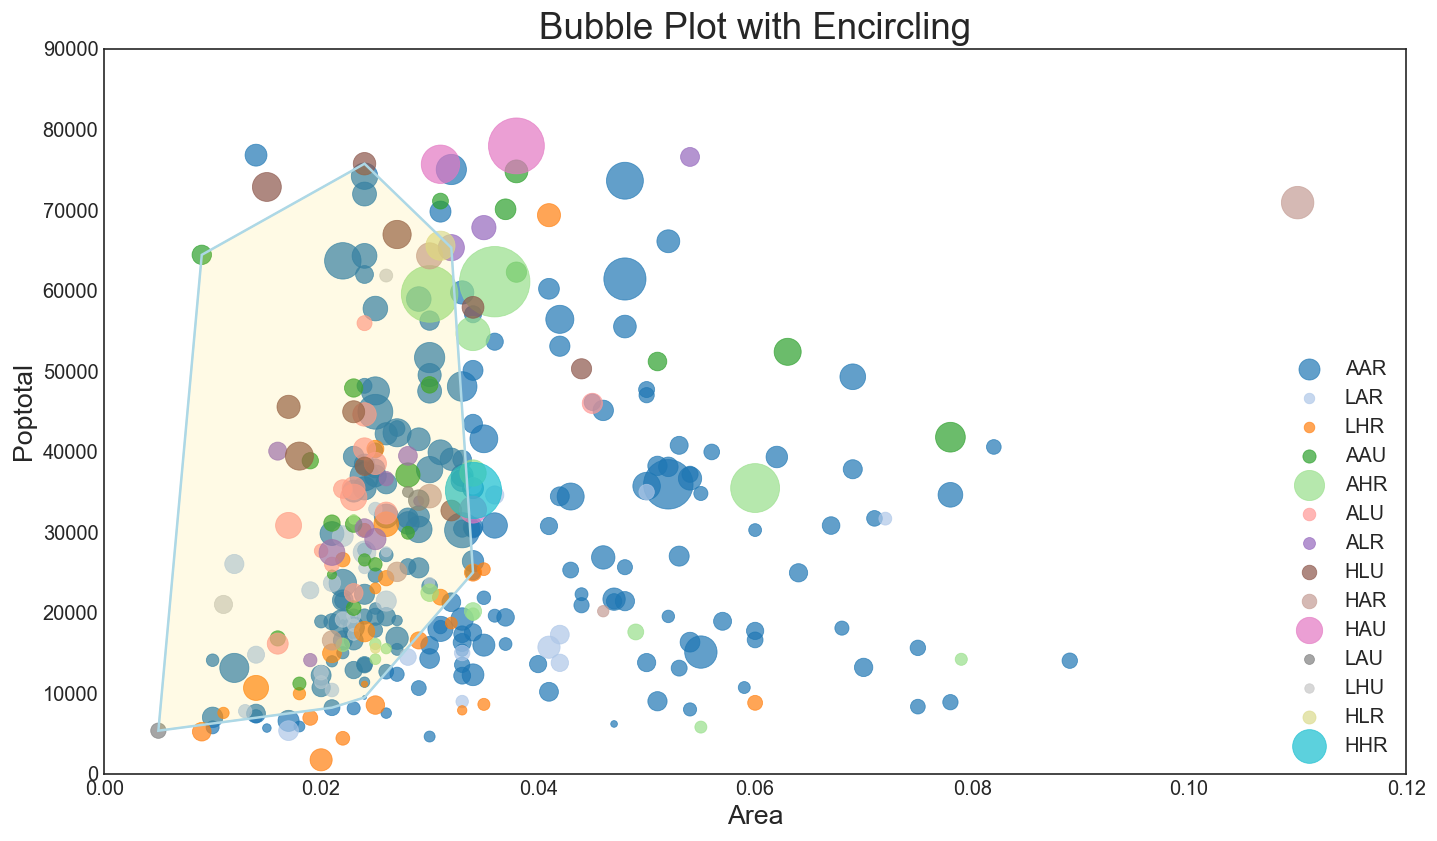

In [27]:
fig = plt.figure(figsize=(14, 8),
                 dpi=120,
                 facecolor="w",
                 edgecolor="k")
for i, category in enumerate(categories):
    plt.scatter("area", "poptotal",
                data=midwest.loc[midwest.category==category, :],
                s=midwest.loc[midwest.category==category, "percasian"]*500,
                # s="dot_size",
                c=colors[i],
                label=str(category),
                edgecolors=colors[i],
                alpha=0.7,
                linewidths=.5)
# 绘制凸包
def encircle(x, y, ax=None, **kwargs):
    if not ax: ax=plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kwargs)
    ax.add_patch(poly)
# 定义需要被框起来的数据, 所有在IN州中的城市
midwest_encircle_data = midwest.loc[midwest.state=="IN", :]
# 绘制金色的面
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         ec="k",
         fc="gold",
         alpha=0.1
        )
# 绘制浅蓝色的线, 而面是透明的
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         ec="lightblue",
         fc="none",
         linewidth=1.5
        )
        
axes = plt.gca()
axes.set(xlim=(0.0, 0.12), ylim=(0, 90000), xlabel="Area", ylabel="Poptotal")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
lgnd = plt.legend(fontsize=12,
                  markerscale=0.6 # 气泡的比例
                 )
plt.show()

In [28]:
mpl.matplotlib_fname()

'c:\\users\\administrator\\.virtualenvs\\env36--r9z0ee0\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

#### 带最佳拟合线的散点图

In [29]:
df = pd.read_csv(r"./data/mpg_ggplot2.csv")  

In [30]:
df.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [31]:
df.shape

(234, 11)

In [32]:
name = ["汽车制造商", "型号名称", "发动机排量(L)", "制造年份", "气缸数量", "手动/自动",
        "驱动类型", "城市里程/加仑", "公路里程/加仑", "汽油种类", "车辆种类"]

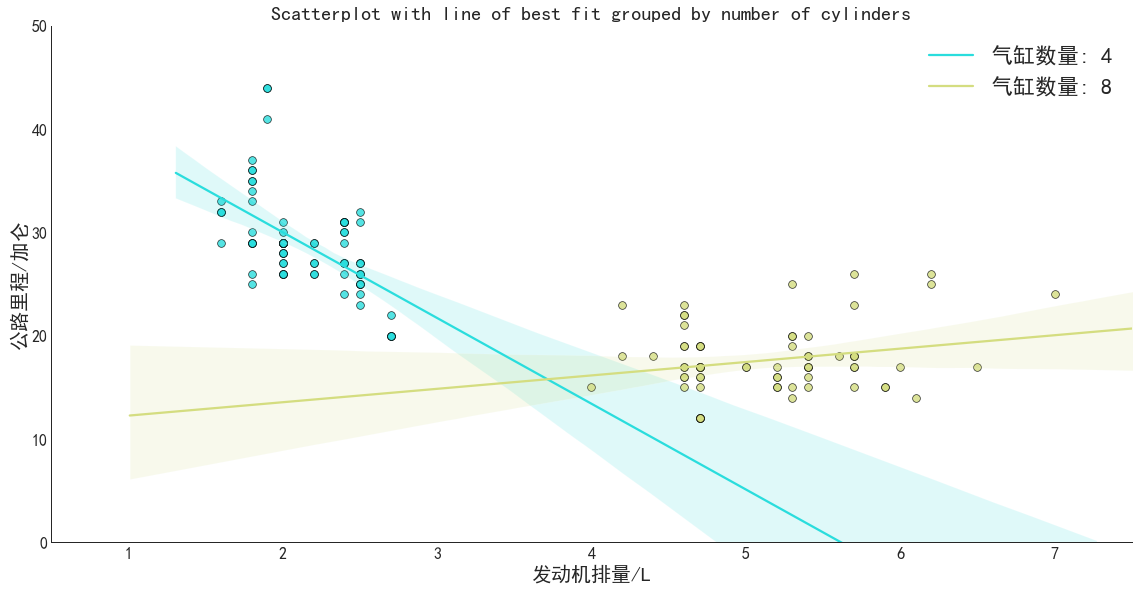

In [33]:
df_select = df.loc[df.cyl.isin([4, 8]), :]
sns.set_style("white")
gridobj = sns.lmplot(x="displ", # 横坐标, 发动机
                     y="hwy", # 纵坐标, 公路里程
                     hue="cyl", # 分类, 气缸数量
                     data=df_select, # DF
                     height=8, # 图像高度
                     aspect=2, # 图像横纵比
                     palette="rainbow", # 调色板
                     legend=False, # 图例
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors="black"))
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams["font.sans-serif"] = ["Simhei"]
plt.xlabel("发动机排量/L", fontsize=20)
plt.ylabel("公路里程/加仑", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["气缸数量: 4", "气缸数量: 8"], fontsize=22)
title = "Scatterplot with line of best fit grouped by number of cylinders"
plt.title(title, fontsize=20)
plt.show()

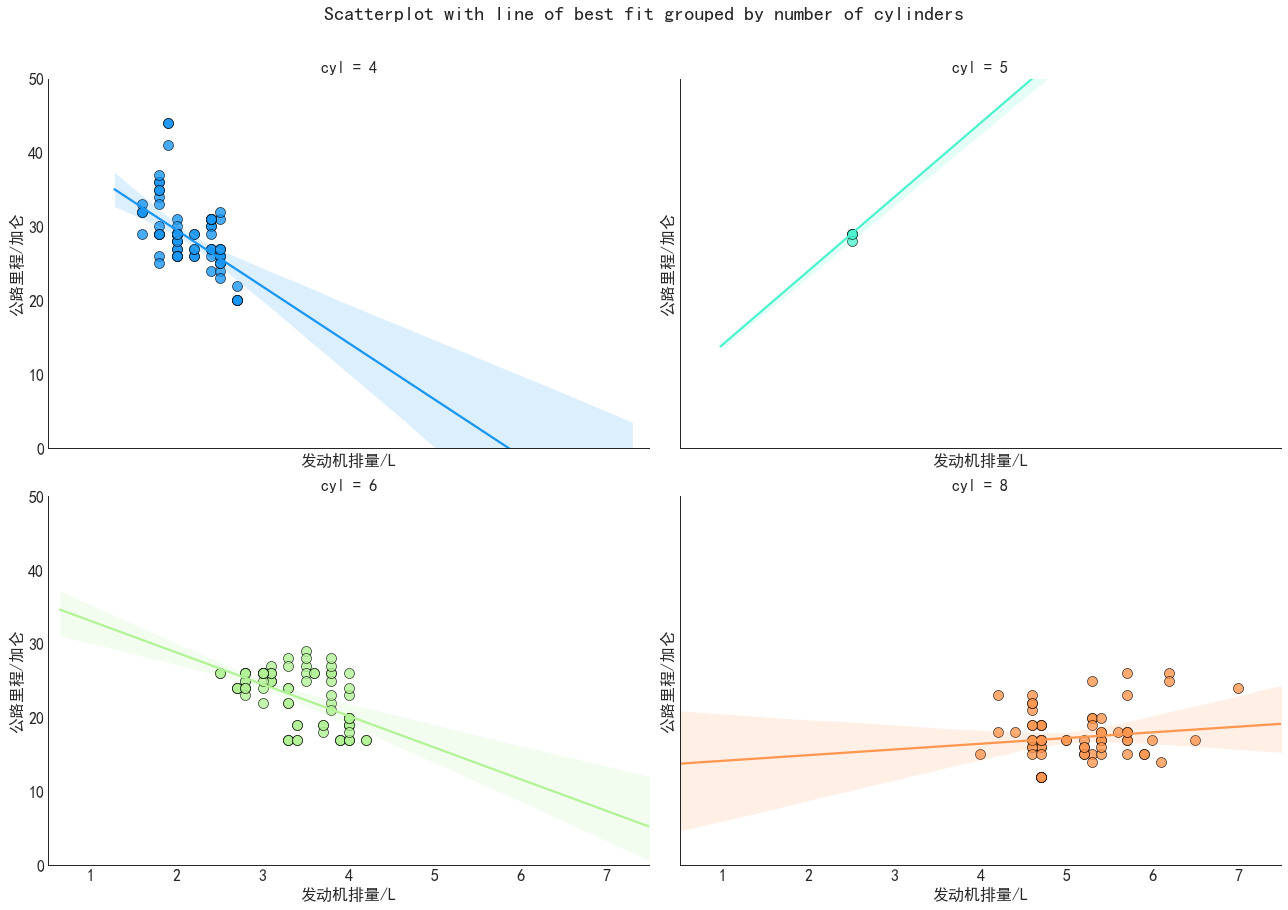

In [34]:
df_select = df.loc[df.cyl.isin([4, 8]), :]
sns.set_style("white")
gridobj = sns.lmplot(x="displ", # 横坐标, 发动机
                     y="hwy", # 纵坐标, 公路里程
                     hue="cyl", # 分类, 气缸数量
                     data=df, # DF
                     height=6, # 图像高度
                     aspect=1.5, # 图像横纵比
                     robust=True, # 鲁棒性
                     palette="rainbow", # 调色板
                     sharex=True,
                     col="cyl", # 按照这个特征中的分类绘制图像
                     col_wrap=2, # 表示对col中类别数量进行折叠
                     legend=False, # 图例,
                     scatter_kws=dict(s=100, linewidths=.7, edgecolors="black"))
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50), xlabel="发动机排量/L", ylabel="公路里程/加仑")
plt.rcParams["font.sans-serif"] = ["Simhei"]
title = "Scatterplot with line of best fit grouped by number of cylinders"
plt.suptitle(title, fontsize=20, y=1.05)
plt.tight_layout(1.1)
plt.show()

#### 抖动的带状图与计数图

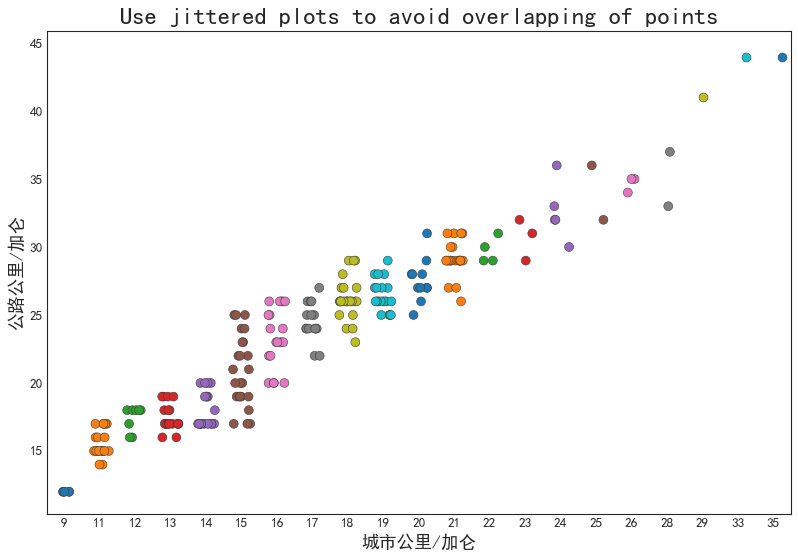

In [35]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
sns.stripplot(df.cty,
              df.hwy,
              jitter=0.25, # 抖动的幅度
              size=8,
              ax=ax,
              linewidth=.5,
              palette="tab10")
plt.title("Use jittered plots to avoid overlapping of points", fontsize=22)
plt.rcParams["font.sans-serif"] = ["Simhei"]
plt.xlabel("城市公里/加仑", fontsize=16)
plt.ylabel("公路公里/加仑", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

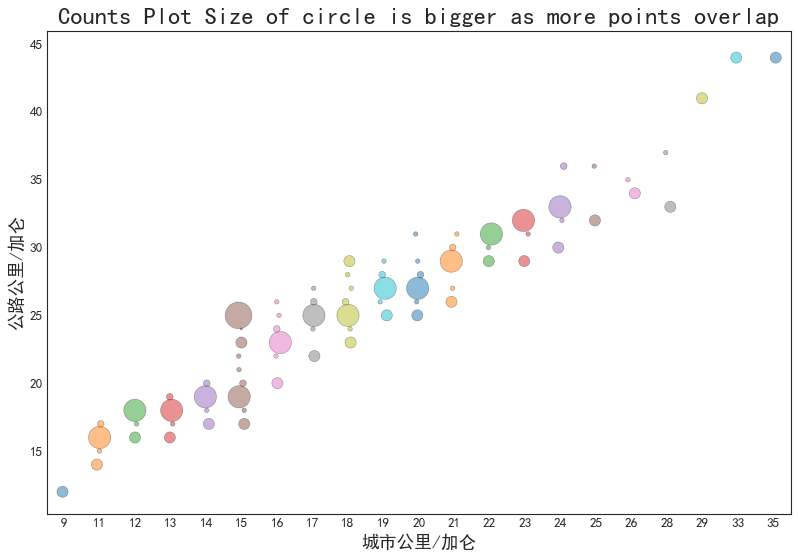

In [36]:
df_counts = df.groupby(["hwy", "cty"]).size().reset_index(name="counts")
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
sns.stripplot(df_counts.cty,
              df_counts.hwy,
              size=df_counts.counts*2, # 尺寸
              ax=ax,
              linewidth=.5,
              palette="tab10",
              alpha=0.5)
plt.title("Counts Plot Size of circle is bigger as more points overlap", fontsize=22)
plt.rcParams["font.sans-serif"] = ["Simhei"]
plt.xlabel("城市公里/加仑", fontsize=16)
plt.ylabel("公路公里/加仑", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### 边缘直方图

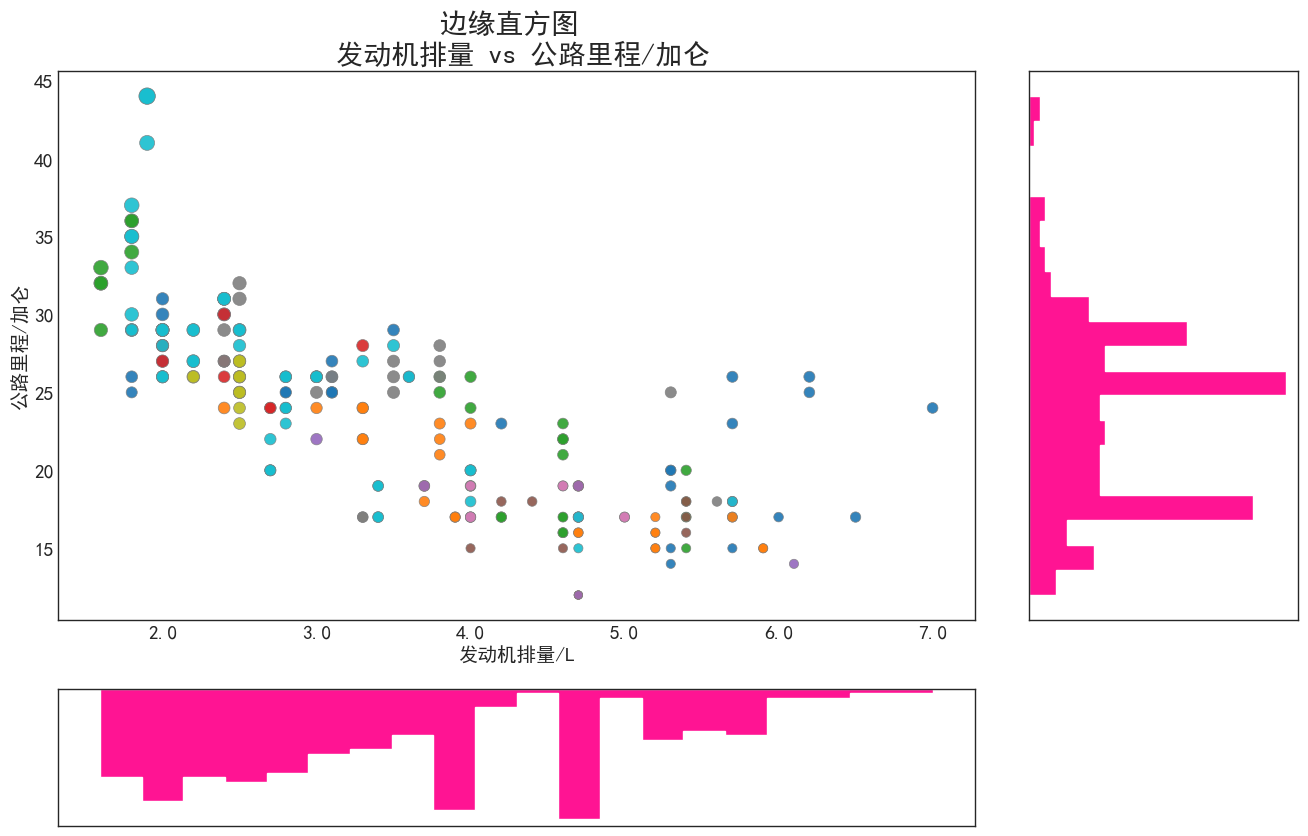

In [37]:
# 分割画布
fig = plt.figure(figsize=(16, 10), dpi=100, facecolor="white")
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])
ax_main.scatter("displ", "hwy",
                s=df.cty*4,
                data=df,
                c=df.manufacturer.astype("category").cat.codes,
                cmap="tab10",
                edgecolors="gray",
                linewidths=.5,
                alpha=.9)
ax_bottom.hist(df.displ,
               bins=20,
               histtype="stepfilled",
               orientation="vertical",
               color="deeppink")
ax_bottom.invert_yaxis() # y轴反向

ax_right.hist(df.hwy,
               bins=20,
               histtype="stepfilled",
               orientation="horizontal",
               color="deeppink")
plt.rcParams["font.sans-serif"] = ["Simhei"]
ax_main.set(title="边缘直方图 \n 发动机排量 vs 公路里程/加仑",
            xlabel="发动机排量/L",
            ylabel="公路里程/加仑")
ax_main.title.set_fontsize(20)

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    # item是Text对象
    item.set_fontsize(14)
for item in [ax_bottom, ax_right]:
    # 去掉直方图上的标尺
    item.set_xticks([])
    item.set_yticks([])
xlabels = ax_main.get_xticks().tolist() # 将现有的标尺取出来, 转化为带一位小数的浮点数
ax_main.set_xticklabels(xlabels)
plt.show()

In [38]:
[*ax_main.xaxis.get_ticklabels()]

[Text(1.0, 0, '1.0'),
 Text(2.0, 0, '2.0'),
 Text(3.0, 0, '3.0'),
 Text(4.0, 0, '4.0'),
 Text(5.0, 0, '5.0'),
 Text(6.0, 0, '6.0'),
 Text(7.0, 0, '7.0'),
 Text(8.0, 0, '8.0')]

In [39]:
ax_main.xaxis.get_label()

Text(0.5, 190.4924242424242, '发动机排量/L')

#### 边缘箱线图

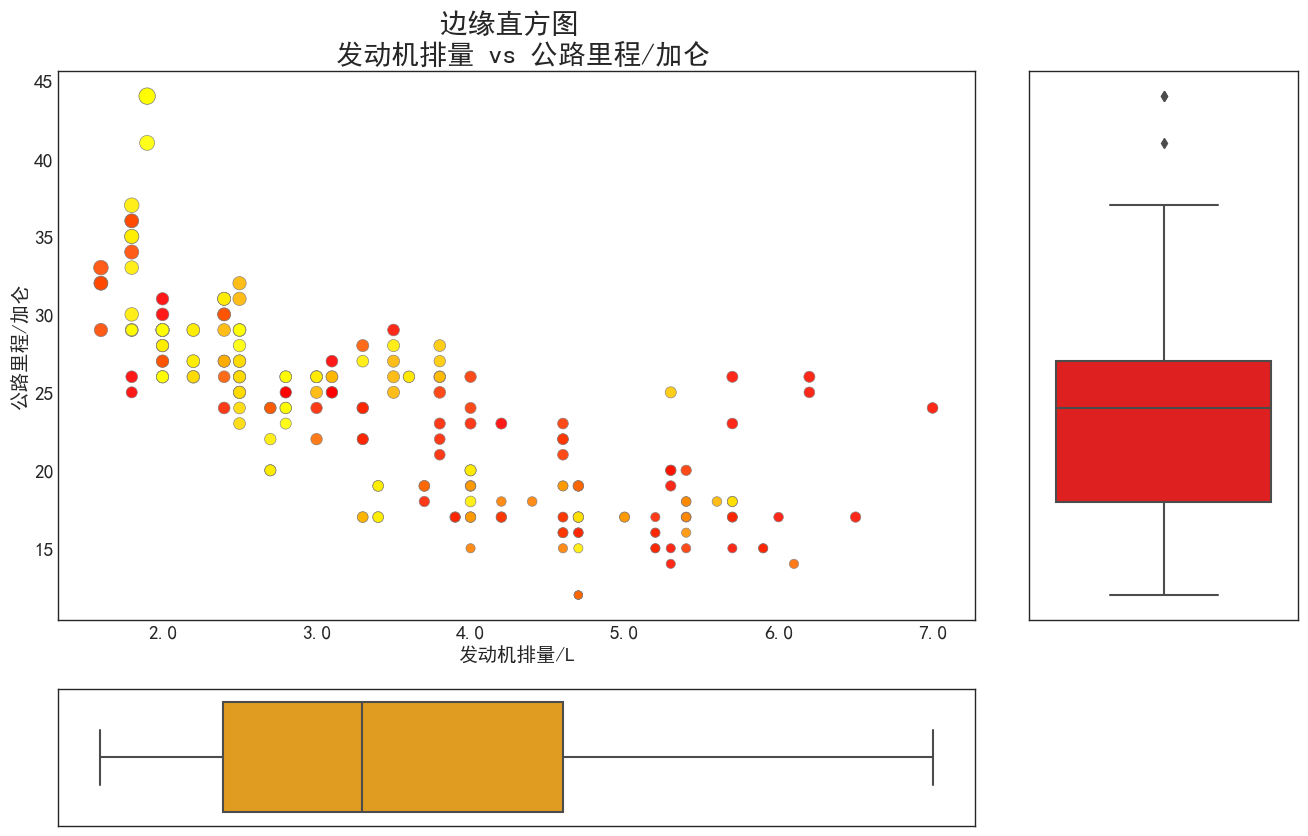

In [40]:
# 分割画布
fig = plt.figure(figsize=(16, 10), dpi=100, facecolor="white")
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])
ax_main.scatter("displ", "hwy",
                s=df.cty*4,
                data=df,
                c=df.manufacturer.astype("category").cat.codes,
                cmap="autumn",
                edgecolors="gray",
                linewidths=.5,
                alpha=.9)
sns.boxplot(x=df.hwy, ax=ax_right, orient="v", color="red")
sns.boxplot(x=df.displ, ax=ax_bottom, orient="h", color="orange")

ax_bottom.set(xlabel="")
ax_right.set(ylabel="")
plt.rcParams["font.sans-serif"] = ["Simhei"]
ax_main.set(title="边缘直方图 \n 发动机排量 vs 公路里程/加仑",
            xlabel="发动机排量/L",
            ylabel="公路里程/加仑")
ax_main.title.set_fontsize(20)

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    # item是Text对象
    item.set_fontsize(14)
for item in [ax_bottom, ax_right]:
    # 去掉直方图上的标尺
    item.set_xticks([])
    item.set_yticks([])
xlabels = ax_main.get_xticks().tolist() # 将现有的标尺取出来, 转化为带一位小数的浮点数
ax_main.set_xticklabels(xlabels)
plt.show()

#### 相关性矩阵

In [41]:
cars = pd.read_csv(r"./data/mtcars.csv")
cars.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.9,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.9,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag


In [42]:
columns = ["英里/加仑", "气缸数量", "排量", "总马力", "驱动轴比", "重量", "1/4英里所用时间",
           "引擎", "变速器", "前进档数", "化油器数量", "用油是否高效", "汽车", "汽车名称"]
cars.columns = columns

In [43]:
coef = cars.corr()

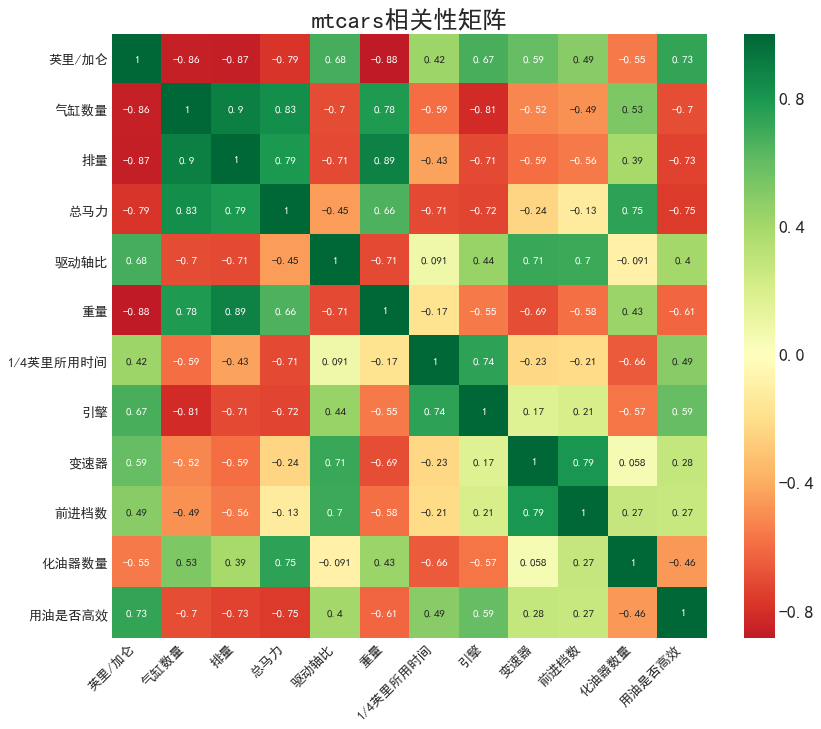

In [44]:
plt.rcParams["font.sans-serif"] = ["Simhei"]
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(coef,
            xticklabels=coef.columns,
            yticklabels=coef.index,
            cmap="RdYlGn",
            center=0, # 中心值
            annot=True # 写入数据
           )
plt.title("mtcars相关性矩阵", fontsize=22)
plt.xticks(fontsize=12, rotation=45, horizontalalignment="right")
plt.yticks(fontsize=12)
plt.show()

#### 成对分析图

In [45]:
from sklearn.datasets import load_iris

In [46]:
iris = pd.DataFrame(np.hstack((load_iris().data, load_iris().target.reshape(-1, 1))))
iris.columns = ["花萼长", "花萼宽", "花瓣长", "花瓣宽", "species"]

In [47]:
species_dict = {
    0.0: "setosa",
    1.0: "versicolor",
    2.0: "virginica",
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}
iris["species"] = iris["species"].map(species_dict)

In [48]:
iris.head(2)

,花萼长,花萼宽,花瓣长,花瓣宽,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


<Figure size 1000x800 with 0 Axes>

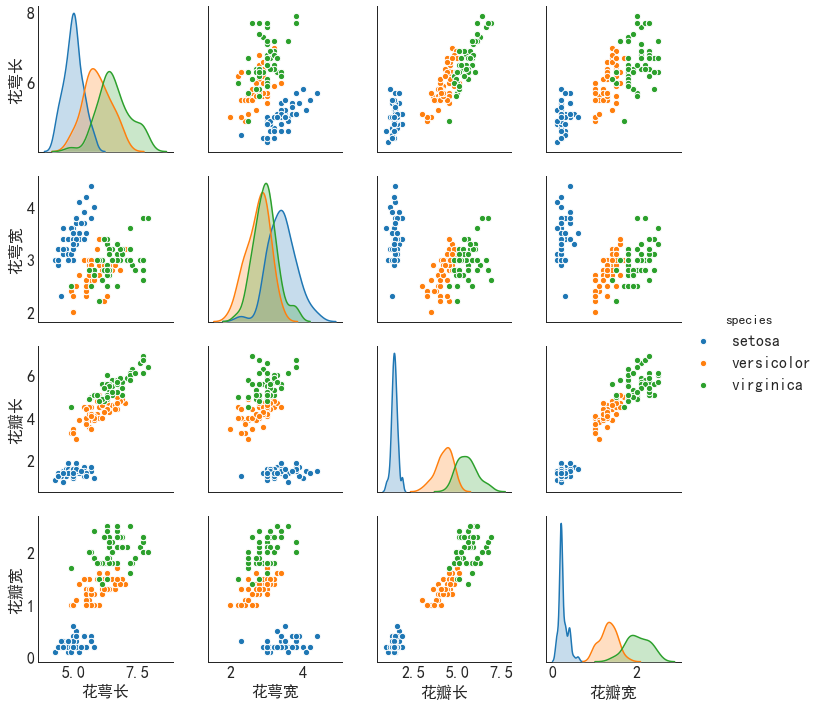

In [49]:
plt.figure(figsize=(10, 8), dpi=100)
plt.rcParams["font.sans-serif"] = ["Simhei"]
sns.pairplot(iris,
             kind="scatter", # 图像类型
             hue="species", # 类别
             plot_kws=dict(s=40, edgecolor="white", linewidth=1))
plt.show()

<Figure size 1000x800 with 0 Axes>

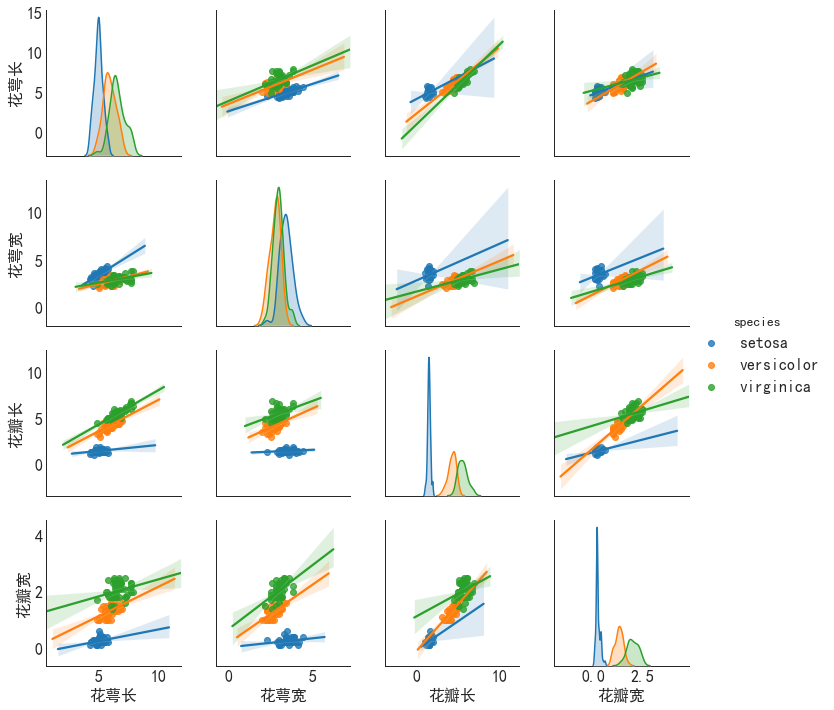

In [50]:
plt.figure(figsize=(10, 8), dpi=100)
plt.rcParams["font.sans-serif"] = ["Simhei"]
sns.pairplot(iris,
             kind="reg", # 图像类型
             hue="species" # 类别
)
plt.show()